# ABC Pharmaceuticals

ABC Pharmaceuticals is embarking on a process to model the inputs and potential revenue generated from our three products given different views on the demand and costs of producing these. This code is for internal analysis of the data coming from our production facility to determine if we can build a model that will allow us to have a clear view of the feed requirements for different forward looking scenarios.

### Required Imports

In [48]:
import pandas as pd
import numpy as np
import joblib
import nbformat
import plotly.express as px
import plotly.graph_objects as go
from scipy.optimize import differential_evolution
from sklearn.model_selection import train_test_split
import helper_code as helper
import numpy as np
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# Data Exploration

ABC Chemicals produces three primary products. To do this, they use 4 raw feed inputs into three operational units. The feed inputs are liquids and have units of measure of mega-litres (Ml), while the three primary products are measured in kilograms (kg). Each feed input is processed through a unit. Due to the type of process occurring, it is possible to also produce by-products. The past 4 years worth of data is in the excel document (Data Inputs.xlsx)

In [49]:
input_data = pd.read_excel("Data_Inputs.xlsx")
input_data.head()

,Timestamp,Raw1,ByProduct,Product1,ByProduct_From_1_to_2,Raw2,Product2,ByProduct_From_1_to_3,Raw3_1,Raw3_2,Product3
0,2019-07-01,150.006321,44.050057,11.867058,9.189283,2.006054,3.580789,0.241373,5.311984,0.649544,2.313002
1,2019-07-02,150.039418,44.941743,10.580847,0.000000,0.000000,0.000000,0.000000,4.976112,0.649954,2.219060
2,2019-07-03,149.979928,46.127335,11.531425,8.978365,2.599721,3.707705,0.000000,4.716594,0.616795,2.173808
3,2019-07-04,149.997513,45.799040,11.222656,8.768551,2.581957,3.645370,0.000000,4.674946,0.600060,2.123399
4,2019-07-05,149.996951,45.450219,13.431639,8.637838,2.609625,3.689441,0.000000,4.799645,0.600083,2.136561


As a first analysis, let us explore the data to ensure that it is complete and usable

In [50]:
#Count same number of entries for all
print(f"Counting rows per feature:", input_data.count())

#Check for nulls
print(f"Counting number of nulls per feature:", input_data.where(input_data.isna()).count())

# #Check for correct datatypes
print(f"DataType check:",input_data.dtypes)

Counting rows per feature: Timestamp                1763
Raw1                     1763
ByProduct                1763
Product1                 1763
ByProduct_From_1_to_2    1763
Raw2                     1763
Product2                 1763
ByProduct_From_1_to_3    1763
Raw3_1                   1763
Raw3_2                   1763
Product3                 1763
dtype: int64
Counting number of nulls per feature: Timestamp                0
Raw1                     0
ByProduct                0
Product1                 0
ByProduct_From_1_to_2    0
Raw2                     0
Product2                 0
ByProduct_From_1_to_3    0
Raw3_1                   0
Raw3_2                   0
Product3                 0
dtype: int64
DataType check: Timestamp                datetime64[ns]
Raw1                            float64
ByProduct                       float64
Product1                        float64
ByProduct_From_1_to_2           float64
Raw2                            float64
Product2                  

Let us continue and plot out the inputs and outputs from the data frame as time series plots

In [51]:
input_data["Timestamp"] = pd.to_datetime(input_data["Timestamp"])

fig = go.Figure()
for title in ["Product1", "Product2", "Product3", "ByProduct"]:
    fig.add_trace(
        go.Scatter(
            mode='lines',
            x=input_data["Timestamp"],
            y=input_data[title],
            hoverinfo='skip',
            name=title,
            # line=dict(color='Black',
            #         width=2)
        )
    )
fig.show()


fig = go.Figure()
for title in ["Raw1", "ByProduct_From_1_to_2", "Raw2", "ByProduct_From_1_to_3", "Raw3_1", "Raw3_2"]:
    fig.add_trace(
        go.Scatter(
            mode='lines',
            x=input_data["Timestamp"],
            y=input_data[title],
            hoverinfo='skip',
            name=title,
            # line=dict(color='Black',
            #         width=2)
        )
    )
fig.show()

Next, let's go through each of the unit operations and see how the input data corresponds to the output from the unit

In [52]:
# Unit 1

fig = go.Figure()
fig.add_trace(
    go.Scatter(
        mode='markers',
        x=input_data["Raw1"],
        y=input_data["Product1"],
        hoverinfo='skip',
        name="Product1",
        # line=dict(color='Black',
        #         width=2)
    )
)
fig.add_trace(
    go.Scatter(
        mode='markers',
        x=input_data["Raw1"],
        y=input_data["ByProduct"],
        hoverinfo='skip',
        name="ByProduct",
        # line=dict(color='Black',
        #         width=2)
    )
)

fig.update_layout({'title': "Byprodut and Product1 from Unit 1 as a function of Feed Raw1",
                   "xaxis": {'title': "Raw1 (Ml)"},
                   "yaxis": {'title': "Product1 (kg), Byproduct (Ml)"}})

fig.show()

Next, unit 2. Unit 2 receives 2 inputs and therefore we need to consider each of them to see what the relationship might be

In [53]:
# TO DO: Replicate analysis above for unit 2
#We want the output to be two graphs , one graph, raw 2 against product 2 and the other graph product from 1 to 2 against product 2
fig = make_subplots(rows=1, cols=2)
fig.add_trace(
    go.Scatter(
        mode='markers',
        x=input_data["Raw2"],
        y=input_data["Product2"],
        hoverinfo='skip',
        name="Product2",
        # line=dict(color='Black',
        #         width=2)
    ),
    row=1, col=1

)

fig.update_layout({'title': "Product2 from Unit 2 as a function of Feed Raw2",
                     "xaxis": {'title': "Raw2 (Ml)"},
                     "yaxis": {'title': "Product2 (kg)"}})
fig.show()

# fig = go.Figure()
fig.add_trace(
    go.Scatter(
        mode='markers',
        x=input_data["ByProduct_From_1_to_2"],
        y=input_data["Product2"],
        hoverinfo='skip',
        name="Product2",
        # line=dict(color='Black',
        #         width=2)
    ),
    row=1, col=2
)

fig.update_layout({'title': "Product2 from Unit 2 as a function of Byproduct from Unit 1 to 2",

                     "xaxis": {'title': "Byproduct from 1 to 2 (Ml)"},
                        "yaxis": {'title': "Product2 (kg)"}})

fig.show()


And finally for unit3

In [54]:
# TO DO: Replicate analysis above for unit 3
#We want the output to be three graphs , one graph, by product 1 to 3 against product 3, the other graph raw 3_1 against product 3 and the last graph raw 3_2 against product 3
fig = make_subplots(rows=1, cols=3)
fig.add_trace(
    go.Scatter(
        mode='markers',
        x=input_data["ByProduct_From_1_to_3"],
        y=input_data["Product3"],
        hoverinfo='skip',
        name="Product3",
        # line=dict(color='Black',
        #         width=2)
    ),
    row=1, col=1
)

fig.update_layout({'title': "Product3 from Unit 3 as a function of Byproduct from Unit 1 to 3",

                        "xaxis": {'title': "Byproduct from 1 to 3 (Ml)"},
                        "yaxis": {'title': "Product3 (kg)"}})

fig.show()

fig.add_trace(
    go.Scatter(
        mode='markers',
        x=input_data["Raw3_1"],
        y=input_data["Product3"],
        hoverinfo='skip',
        name="Product3",
        # line=dict(color='Black',
        #         width=2)
    ), row=1, col=2
)

fig.update_layout({'title': "Product3 from Unit 3 as a function of Feed Raw3_1",

                        "xaxis": {'title': "Raw3_1 (Ml)"},
                        "yaxis": {'title': "Product3 (kg)"}})
fig.show()

fig.add_trace(
    go.Scatter(
        mode='markers',
        x=input_data["Raw3_2"],
        y=input_data["Product3"],
        hoverinfo='skip',
        name="Product3",
        # line=dict(color='Black',
        #         width=2)
    ), row=1, col=3
)

fig.update_layout({'title': "Product3 from Unit 3 as a function of Feed Raw3_2",

                        "xaxis": {'title': "Raw3_2 (Ml)"},
                        "yaxis": {'title': "Product3 (kg)"}})
fig.show()




Just for completeness, let us do a correlation matrix as well

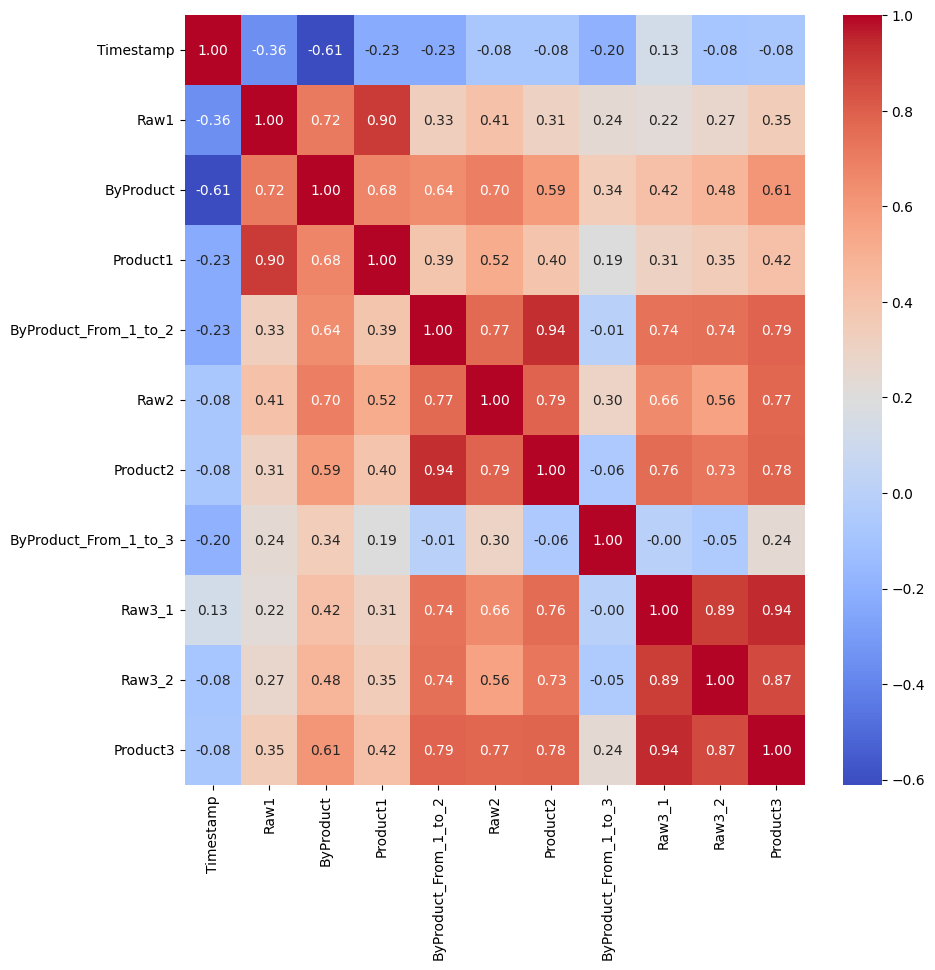

In [55]:
# TO DO: Plot a correlation heatmap
#fig = px.imshow(input_data.corr())
#fig.show()

#Print the correlation matrix
#print(input_data.corr())

# TO DO: Generste a correlation heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(input_data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()




# Data Cleaning

Before we start cleaning the data, we will split the data into the inputs and outputs for each unit operation. We will also add the timestamp as the index.

In [56]:
unit_1       = input_data[["Raw1", "ByProduct", "Product1"]]
unit_1.index = input_data["Timestamp"]
unit_2       = input_data[["ByProduct_From_1_to_2", "Raw2", "Product2"]]
unit_2.index = input_data["Timestamp"]
unit_3       = input_data[["ByProduct_From_1_to_3", "Raw3_1", "Raw3_2", "Product3"]]
unit_3.index = input_data["Timestamp"]

#Checking output
unit_1.describe()

,Raw1,ByProduct,Product1
count,1763.000000,1763.000000,1763.000000
mean,126.442377,32.454380,9.225475
std,49.583409,21.982259,3.768877
min,0.000000,0.000000,0.000000
25%,91.690002,17.179176,6.289587
50%,122.508976,26.589045,10.099381
75%,165.001311,48.386907,11.915804
max,200.026556,80.508544,16.266647


We need to clean the data before testing any models. An external source has provided code that can be used to do this. The function is is the helper_code file, and is called mahalanobis_outlier_removal. We have not yet had time to implement this approach.

In [69]:
# TO DO: Implement the mahalanobis_outlier_removal function
clean_unit1 = helper.mahalanobis_outlier_removal(unit_1,0.1)
clean_unit2 = helper.mahalanobis_outlier_removal(unit_2, 0.1)
clean_unit3 = helper.mahalanobis_outlier_removal(unit_3, 0.1)

#Remove the rows in each unit with only 0s
clean_unit1 = clean_unit1[(clean_unit1.T != 0).any()]
clean_unit2 = clean_unit2[(clean_unit2.T != 0).any()]
clean_unit3 = clean_unit3[(clean_unit3.T != 0).any()]


#print out insights
print(f"Unit 1: {unit_1.shape[0]} samples, cleaned to {clean_unit1.shape[0]} samples")
print(f"Unit 2: {unit_2.shape[0]} samples, cleaned to {clean_unit2.shape[0]} samples")
print(f"Unit 3: {unit_3.shape[0]} samples, cleaned to {clean_unit3.shape[0]} samples")

#print how many outliers were removed
print(f"Unit 1: {unit_1.shape[0]-clean_unit1.shape[0]} outliers removed")
print(f"Unit 2: {unit_2.shape[0]-clean_unit2.shape[0]} outliers removed")
print(f"Unit 3: {unit_3.shape[0]-clean_unit3.shape[0]} outliers removed")

#print unit1 cleaned data
# clean_unit1.describe()
#clean_unit2.describe()
# clean_unit3.describe()

#export cleaned data as excell
# clean_unit1.to_excel("clean_unit1.xlsx")
# clean_unit2.to_excel("clean_unit2.xlsx")
# clean_unit3.to_excel("clean_unit3.xlsx")
clean_unit1.head()

Unit 1: 1763 samples, cleaned to 1513 samples
Unit 2: 1763 samples, cleaned to 1389 samples
Unit 3: 1763 samples, cleaned to 1317 samples
Unit 1: 250 outliers removed
Unit 2: 374 outliers removed
Unit 3: 446 outliers removed


,Raw1,ByProduct,Product1
Timestamp,,,
2019-07-01,150.006321,44.050057,11.867058
2019-07-02,150.039418,44.941743,10.580847
2019-07-03,149.979928,46.127335,11.531425
2019-07-04,149.997513,45.799040,11.222656
2019-07-05,149.996951,45.450219,13.431639


# Unit Model Building

We need to create training and testing sets.

In [58]:
# TO DO: split the data into train and test datasets. For now we don't need to consider an out of time or validation dataset
unit_1_train, unit_1_test = train_test_split(clean_unit1, test_size=0.3)
unit_2_train, unit_2_test = train_test_split(clean_unit2, test_size=0.3)
unit_3_train, unit_3_test = train_test_split(clean_unit3, test_size=0.3)

Now we can train a model for each of the four units

In [59]:
# TO DO: train the four models
%%capture
model1_product   = helper.train_model(unit_1_train, ["Raw1"], ["Product1"], "product_1", save_model=False)
model1_byproduct = helper.train_model(unit_1_train, ["Raw1"], ["ByProduct"], "byproduct",model_type="Non-Linear", save_model=False)
model2_product   = helper.train_model(unit_2_train, ["ByProduct_From_1_to_2", "Raw2"], ["Product2"], "product_2", model_type="Non-Linear", save_model=False)
model3_product   = helper.train_model(unit_3_train, ["ByProduct_From_1_to_3", "Raw3_1", "Raw3_2"], ["Product3"], "product_3", model_type="Non-Linear", save_model=False)

In [60]:

y_pred_1_product = model1_product.predict(unit_1_test[["Raw1"]])
y_pred_1_byproduct = model1_byproduct.predict(unit_1_test[["Raw1"]])
y_pred_2_product = model2_product.predict(unit_2_test[["ByProduct_From_1_to_2", "Raw2"]])
y_pred_3_product = model3_product.predict(unit_3_test[["ByProduct_From_1_to_3", "Raw3_1", "Raw3_2"]])

Let's evaluate the models that we have built

In [ ]:
# TO DO: Evaluate MSE, MAE, R2, MAPE and RMSE for each of the models, also get parity plots and residuals
unit1_prod_perf = helper.modelperf(y_pred_1_product, unit_1_test[["Product1"]])
unit1_byproduct_perf = helper.modelperf(y_pred_1_byproduct, unit_1_test["ByProduct"])
unit2_prod_perf = helper.modelperf(y_pred_2_product, unit_2_test["Product2"])
unit3_prod_perf = helper.modelperf(y_pred_3_product, unit_3_test["Product3"])

#Parity plots and residuals(not a helper function)
fig = make_subplots(rows=2, cols=2, subplot_titles=("Product1 from Unit 1 Parity Plot", "ByProduct from Unit 1 Parity Plot",
                                                    "Product2 from Unit 2 Parity Plot", "Product3 from Unit 3 Parity Plot"))
fig.add_trace(
    go.Scatter(
        mode='markers',
        x=unit_1_test["Product1"],
        y=y_pred_1_product,
        hoverinfo='skip',
        name="Product1",
        # line=dict(color='Black',
        #         width=2)
    ), row=1, col=1
)

fig.update_layout({'title': "Product1 from Unit 1 Parity Plot",

                        "xaxis": {'title': "Product1 (kg)"},
                        "yaxis": {'title': "Predicted Product1 (kg)"}})
fig.show()

fig.add_trace(
    go.Scatter(
        mode='markers',
        x=unit_1_test["ByProduct"],
        y=y_pred_1_byproduct,
        hoverinfo='skip',
        name="ByProduct",
        # line=dict(color='Black',
        #         width=2)
    ), row=1, col=2
)

fig.update_layout({'title': "ByProduct from Unit 1 Parity Plot",


                        "xaxis": {'title': "ByProduct (Ml)"},
                        "yaxis": {'title': "Predicted ByProduct (Ml)"}})
fig.show()

fig.add_trace(
    go.Scatter(
        mode='markers',
        x=unit_2_test["Product2"],
        y=y_pred_2_product,
        hoverinfo='skip',
        name="Product2",
        # line=dict(color='Black',
        #         width=2)
    ), row=2, col=1
)

fig.update_layout({'title': "Product2 from Unit 2 Parity Plot",

                        "xaxis": {'title': "Product2 (kg)"},
                        "yaxis": {'title': "Predicted Product2 (kg)"}})
fig.show()

fig.add_trace(
    go.Scatter(
        mode='markers',
        x=unit_3_test["Product3"],
        y=y_pred_3_product,
        hoverinfo='skip',
        name="Product3",
        # line=dict(color='Black',
        #         width=2)
    ), row=2, col=2
)

fig.update_layout({'title': "Product3 from Unit 3 Parity Plot",

                        "xaxis": {'title': "Product3 (kg)"},
                        "yaxis": {'title': "Predicted Product3 (kg)"}})

fig.show()

In [62]:
fig = make_subplots(rows=2, cols=2, subplot_titles=("Product1 from Unit 1 Residuals", "ByProduct from Unit 1 Residuals",
                                                    "Product2 from Unit 2 Residuals", "Product3 from Unit 3 Residuals"))

def normal_distribution(x, mean, std):
    return (1/(std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)

#Residual histograms, super imposed on normal distribution( no code in helper function)

fig.add_trace(
    go.Histogram(
        x=product1_actual - product1_predicted,
        histnorm='probability',
        name="Product1 Residuals",
        opacity=0.75
    ),
    row=1, col=1
)


fig.update_layout({'title': "Product1 from Unit 1 Residuals",

                        "xaxis": {'title': "Residuals (kg)"},
                        "yaxis": {'title': "Density"}})

xy = np.array(list(unit_1_test["ByProduct"])).flatten()


fig.add_trace(
    go.Histogram(
        x= xy - y_pred_1_byproduct.flatten(),
        histnorm='probability',
        name="ByProduct Residuals",
        opacity=0.75
    ),
    row=1, col=2
)

fig.update_layout({'title': "ByProduct from Unit 1 Residuals",

                        "xaxis": {'title': "Residuals (Ml)"},
                        "yaxis": {'title': "Density"}})



fig.add_trace(
    go.Histogram(
        x=unit_2_test["Product2"]-y_pred_2_product.flatten(),
        name="Product2 Residuals",
        opacity=0.75
    ),
    row=2, col=1
)

fig.update_layout({'title': "Product2 from Unit 2 Residuals",

                        "xaxis": {'title': "Residuals (kg)"},
                        "yaxis": {'title': "Density"}})

fig.add_trace(
    go.Histogram(
        x=unit_3_test["Product3"]-y_pred_3_product.flatten(),
        name="Product3 Residuals",
        opacity=0.75
    ),
    row=2, col=2
)

fig.show()

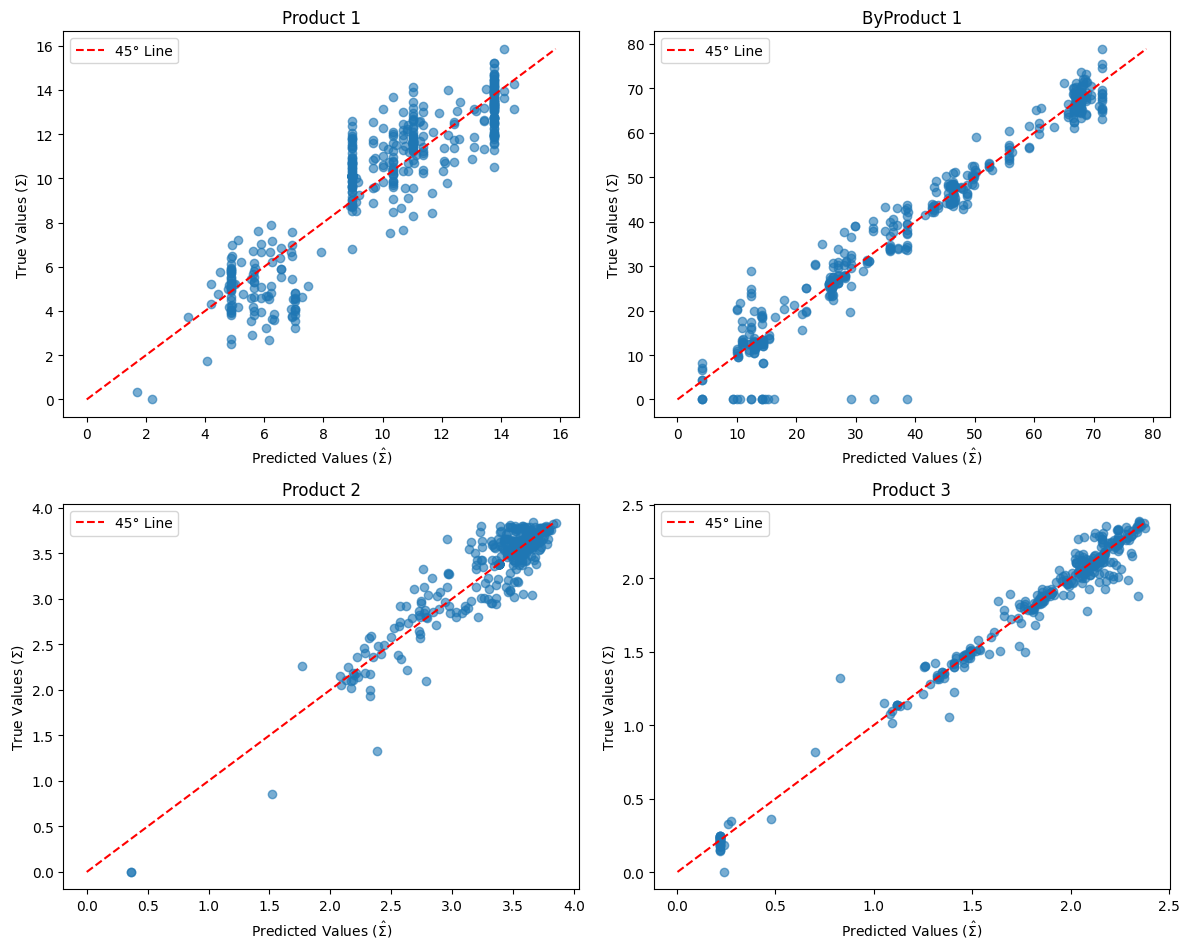

In [63]:
# Define true and predicted values for each product
y_true_1_product   = unit_1_test["Product1"]
y_true_1_byproduct = unit_1_test["ByProduct"]
y_true_2_product   = unit_2_test["Product2"]
y_true_3_product   = unit_3_test["Product3"]

# List of tuples for easier iteration
data = [
    (y_true_1_product, y_pred_1_product, "Product 1"),
    (y_true_1_byproduct, y_pred_1_byproduct, "ByProduct 1"),
    (y_true_2_product, y_pred_2_product, "Product 2"),
    (y_true_3_product, y_pred_3_product, "Product 3")
]

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Iterate through each product to plot
for (y_true, y_pred, title), ax in zip(data, axes.flatten()):
    # Scatter plot of predicted vs true values
    ax.scatter(y_pred, y_true, alpha=0.6)
    ax.set_title(title)
    ax.set_xlabel("Predicted Values ($\hat{\Sigma}$)")
    ax.set_ylabel("True Values ($\Sigma$)")

    # Add 45° diagonal line
    min_val = min(y_true.min(), y_pred.min())
    max_val = max(y_true.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', label="45° Line")
    ax.legend()

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

Now we can build a final version of the model that is built with all the data

In [73]:
# TO DO: Build and save final models
%%capture
final1_product   = helper.train_model(clean_unit1, ["Raw1"], ["Product1"], "product_1", save_model=True)
final1_byproduct = helper.train_model(clean_unit1, ["Raw1"], ["ByProduct"], "byproduct",model_type="Non-Linear", save_model=True)
final2_product   = helper.train_model(clean_unit2, ["ByProduct_From_1_to_2", "Raw2"], ["Product2"], "product_2", model_type="Non-Linear", save_model=True)
final3_product   = helper.train_model(clean_unit3, ["ByProduct_From_1_to_3", "Raw3_1", "Raw3_2"], ["Product3"], "product_3", model_type="Non-Linear", save_model=True)


FileNotFoundError: [Errno 2] No such file or directory: 'unit_models/product_1.pkl'

# Plant Model Build

The next step in the process is to build a model for the whole of the plant. This will take as inputs, the feed rates of the 4 raw feeds, as well as the fraction of byproduct that is directed to each of unit2 and unit3.

In [65]:
def plant(plant_input: pd.DataFrame):
    # TO DO:
    # Update code to allow the byproduct to have an excess stream as well.
    total_byproduct                   = plant_input["byproduct_to_unit2"] + plant_input["byproduct_to_unit3"]
    plant_input["byproduct_to_unit2"] = plant_input["byproduct_to_unit2"] / total_byproduct
    plant_input["byproduct_to_unit3"] = plant_input["byproduct_to_unit3"] / total_byproduct

    # Load trained models for each unit's product and byproduct
    reg_product1  = joblib.load("unit_models/product_1.joblib")
    reg_byproduct = joblib.load("unit_models/byproduct.joblib")
    reg_product2  = joblib.load("unit_models/product_2.joblib")
    reg_product3  = joblib.load("unit_models/product_3.joblib")

    # Predict for unit 1
    product1  = reg_product1.predict(plant_input[["Raw1"]]).reshape(len(plant_input),)
    byproduct = reg_byproduct.predict(plant_input[["Raw1"]])

    plant_input["byproduct_to_unit2"] = plant_input["byproduct_to_unit2"]/(plant_input["byproduct_to_unit2"] + plant_input["byproduct_to_unit3"])
    plant_input["byproduct_to_unit3"] = plant_input["byproduct_to_unit3"]/(plant_input["byproduct_to_unit2"] + plant_input["byproduct_to_unit3"])

    # plant_input : 6 input feeds, and 2 values for the percentages of each feed that goes to unit 2 and 3
    reg_product1  = joblib.load("unit_models/{}.joblib".format("product_1"))
    reg_byproduct = joblib.load("unit_models/{}.joblib".format("byproduct"))
    reg_product2  = joblib.load("unit_models/{}.joblib".format("product_2"))
    reg_product3  = joblib.load("unit_models/{}.joblib".format("product_3"))

    product1  = reg_product1.predict(plant_input[["Raw1"]]).reshape([len(plant_input[["Raw1"]]),])
    byproduct = reg_byproduct.predict(plant_input[["Raw1"]])

    plant_input["byproduct"]             = byproduct
    plant_input["ByProduct_From_1_to_2"] = plant_input["byproduct"]*plant_input["byproduct_to_unit2"]
    plant_input["ByProduct_From_1_to_3"] = plant_input["byproduct"]*plant_input["byproduct_to_unit3"]


    product2 = reg_product2.predict(plant_input[["ByProduct_From_1_to_2", "Raw2"]])
    product3 = reg_product3.predict(plant_input[["ByProduct_From_1_to_3", "Raw3_1", "Raw3_2"]])

    return product1, product2, product3, plant_input["byproduct"] - plant_input["ByProduct_From_1_to_2"] - plant_input["ByProduct_From_1_to_3"]

# Plant Optimization

Now we need to define the objective function to use for the optimization

In [74]:
import additional_code as add
def objective_function(product1, product2, product3, byproduct,
                       product_sell_prices, product_demand, unmet_demand_penalty,
                       storage_costs, discard_costs, detailed=False):

    # TO DO: Build out the objective function required for the optimization
    return add.objective_function(product1, product2, product3, byproduct,
                       product_sell_prices, product_demand, unmet_demand_penalty,
                       storage_costs, discard_costs, detailed)

ModuleNotFoundError: No module named 'planning_model_build_v1'

Now we need to build the optimizer. Based on prior experience, the differential evolution algorithm has been selected for the optimizer, however, this is not required

In [ ]:
def optimizer(
        bounds,
        opt_params,
        PRODUCT_SELL_PRICE,
        PRODUCT_DEMAND,
        PRODUCT_UNMET_DEMAND_PENALTY,
        PRODUCT_STORAGE_COST,
        PRODUCT_DISCARD_COST
        ):

    def model(X_in):
        if len(X_in.shape) == 1:
            X_in = X_in.reshape([1,6])
        X_in = pd.DataFrame(X_in, columns=["Raw1","Raw2","Raw3_1","Raw3_2","byproduct_to_unit2","byproduct_to_unit3"])
        if np.isnan(X_in.iloc[0,0]):
            return np.nan
        product1, product2, product3, byproduct = plant(X_in)

        objective = objective_function(product1, product2, product3, byproduct,
                       PRODUCT_SELL_PRICE, PRODUCT_DEMAND, PRODUCT_UNMET_DEMAND_PENALTY,
                       PRODUCT_STORAGE_COST, PRODUCT_DISCARD_COST)
        return objective.iloc[0]

    result = differential_evolution(model, bounds=bounds, **opt_params)

    return result

# Final Output

We need to capture the outputs from all the scenarios

# Visualisaction and Analysis

Let us get some visualisations of the outputs, or else get pretty printed versions that compare the outputs of the different scenarios